In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your data file
file_path = 'IIHR-data.txt'

# Read the data into a DataFrame
# If the file is space-separated, you can specify the delimiter as ' ' (space)
# For tab-separated files, use '\t'
data = pd.read_csv(file_path, delimiter='\t', skipinitialspace=True)

# Display the first few rows of the DataFrame
print(data.head())

     J        Kt        Kq      10Kq       eta  side
0  0.1  0.601538  0.146444  1.464440  0.065375  port
1  0.2  0.593757  0.144970  1.449699  0.130371  port
2  0.3  0.551041  0.134973  1.349729  0.194930  port
3  0.4  0.536078  0.132235  1.322349  0.258084  port
4  0.5  0.493776  0.122645  1.226449  0.320384  port


In [13]:
# Filter the data based on the "side" column
port_data = data[data['side'] == 'port']
starboard_data = data[data['side'] == 'starboard']

### Plot openwater curves

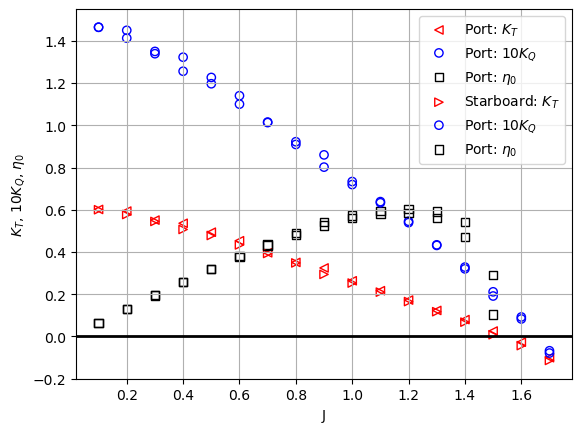

In [58]:
# Plot port data
plt.scatter(port_data['J'], port_data['Kt'], label='Port: $K_T$', 
            facecolors='none', edgecolors='red', marker='<')
plt.scatter(port_data['J'], port_data['10Kq'], label='Port: $10K_Q$', 
            facecolors='none', edgecolors='blue', marker='o')
plt.scatter(port_data['J'], port_data['eta'], label='Port: $\eta_0$', 
            facecolors='none', edgecolors='black', marker='s')

# Plot starboard data
plt.scatter(starboard_data['J'], starboard_data['Kt'], label='Starboard: $K_T$', 
             facecolors='none', edgecolors='red', marker='>')
plt.scatter(port_data['J'], starboard_data['10Kq'], label='Port: $10K_Q$', 
            facecolors='none', edgecolors='blue', marker='o')
plt.scatter(port_data['J'], starboard_data['eta'], label='Port: $\eta_0$', 
            facecolors='none', edgecolors='black', marker='s')

# Customizing the plot
plt.xlabel('J')
plt.ylabel('$K_T$, $10K_Q$, $\eta_0$')
#plt.title('Plot of Column J vs Column Kt')
plt.legend()
# Add a heavy line on the x-axis
plt.axhline(y=0, color='black', linewidth=2)
plt.grid(True)

# Set y-axis range
plt.ylim(-0.2, 1.55)

# Show the plot
plt.show()

### Calculate the mean and standard deviation of the efficiency

In [77]:
# Group by column J and calculate the mean and standard deviation for eta
grouped_data = data.groupby('J')['eta'].agg(['mean', 'std'])

# Display the grouped data
print(grouped_data)

         mean       std
J                      
0.1  0.065315  0.000085
0.2  0.130252  0.000168
0.3  0.194577  0.000499
0.4  0.257483  0.000851
0.5  0.319183  0.001699
0.6  0.378061  0.002535
0.7  0.433648  0.003281
0.8  0.486079  0.007268
0.9  0.532938  0.010957
1.0  0.566051  0.008853
1.1  0.587649  0.009916
1.2  0.594631  0.012991
1.3  0.575579  0.022518
1.4  0.507428  0.049922
1.5  0.197603  0.133122
1.6 -1.033448  0.414209
1.7  3.966184  0.077276


### Find the converge factor for 2 samples

In [80]:
from scipy.stats import t
# Degrees of freedom (n-1)
degrees_of_freedom = 1  # Replace with your actual degrees of freedom value (n-1)

# Confidence level
confidence_level = 0.95

# Calculate the inverse of the Student's t-distribution
t_inverse = t.ppf(1 - (1 - confidence_level) / 2, df=degrees_of_freedom)

# Print the result
print(f"Inverse Student's t at {confidence_level*100}% confidence with {degrees_of_freedom} degrees of freedom: {t_inverse:.4f}")

Inverse Student's t at 95.0% confidence with 1 degrees of freedom: 12.7062


### Plot the efficiency with the mean and expanded uncertainty

In [82]:
print(grouped_data.head())

         mean       std
J                      
0.1  0.065315  0.000085
0.2  0.130252  0.000168
0.3  0.194577  0.000499
0.4  0.257483  0.000851
0.5  0.319183  0.001699


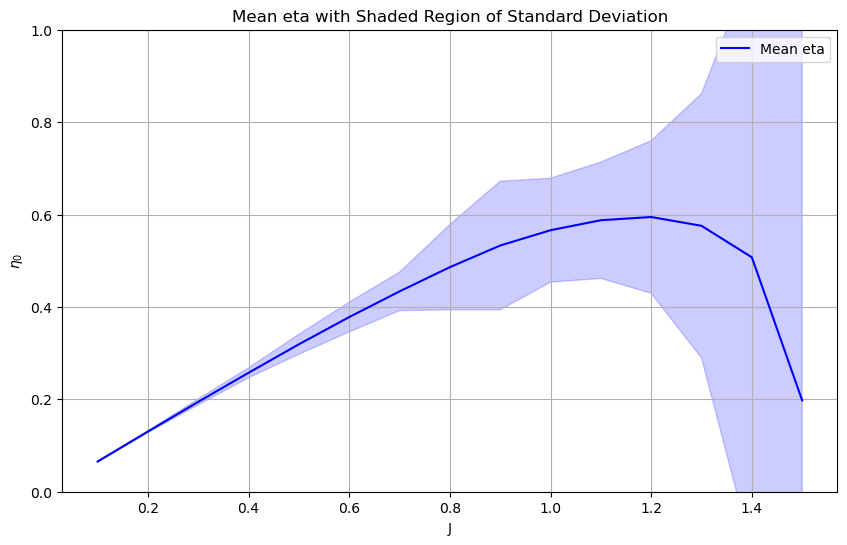

In [98]:
grouped_data = grouped_data[(grouped_data.index >= 0) & (grouped_data.index <= 1.65)]

# Extract values for plotting
J_values = grouped_data.index
mean_eta = grouped_data['mean']
std_eta = grouped_data['std']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean eta
plt.plot(J_values, mean_eta, label='Mean eta', color='blue')

U = std_eta*t_inverse

# Shade the region around the mean eta with standard deviation
plt.fill_between(J_values, mean_eta - U, mean_eta + U, color='blue', alpha=0.2)

# Customizing the plot
plt.xlabel('J')
plt.ylabel('${\eta}_0$')
plt.title('Mean eta with Shaded Region of Standard Deviation')
plt.grid(True)
plt.legend()

# Set y-axis range
plt.ylim(-0., 1.)

# Show the plot
plt.show()
